Let's look at a practical way of performing a polynomial regression.

In this example we are going to predict the salary of a candidate given the experience the candidate has. The HR of Sanford and Sons Limited, is looking to hire for a senior postion in the company. As a policy, the company has a salary distribution dataset that they use to determine how much salary to give to their employees based on their experience. As a data scientist, you are tasked creating a model that will help them with making salary predictions given  years of experience. In this case, we want to predict the amount of salary a canditate with 6 and half years of experience should get. You are provided with following dataset.

[Download Dataset](https://drive.google.com/file/d/153tLxmGZxDhVmh2o0wUP8UjFPZPmW0Ux/view?usp=sharing)

# Importing the libraries 





In [39]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression




# Load Data 

In [40]:
dataset=pd.read_csv('../position_salaries.csv')

In [41]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [42]:
X=dataset.iloc[:,1:2]

y=dataset.iloc[:,2]

print(X)

print(y)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


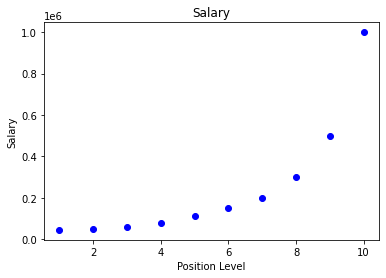

In [43]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Observation**

From the scatter plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying Linear regression on this dataset would not give us the correct value.

The other alternative we are left with is applying polynomial regression.

**Manual prediction**

Before we dive into polynomial regression, let's do some manual prediction of own and then we can compare the results we get to the results we'll get after doing polynomial regression in a short while.

From our problem statement, we need to predict the salary of a candidate with 6.5 years of experience. From our dataset, we already know the salary for  candidates with 6 and 7 years of experience which is Ksh 150,000 and Ksh 200,000 respectively.This means that the salary for a candidate with 6.5 years of experience lies between this two years.Therefore, all we need to do is get the mean of this two years, right?

(150,000 + 200,000)/ 2 = KSh 175,000

From this, we can conclude that the desired salary is 175,000

Now let's do it using polynomial regression 

In [44]:
X_train,y_train, X_test, y_test=train_test_split(X,y, test_size = 0.2, random_state=0)

In [45]:
reg_line=LinearRegression()
reg_line.fit(X,y)

LinearRegression()

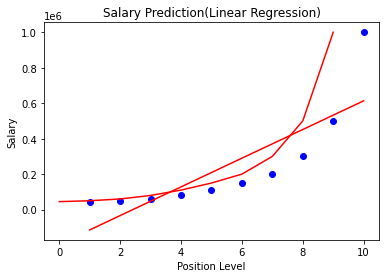

In [46]:
plt.scatter(X,y, color='blue')

plt.plot(X, reg_line.predict(X), y, color='red')

plt.title('Salary Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [47]:
# Fit polynomial Regression to the dataset
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)


In [50]:
pol_reg=PolynomialFeatures(degree=2)
X_poly=pol_reg.fit_transform(X)

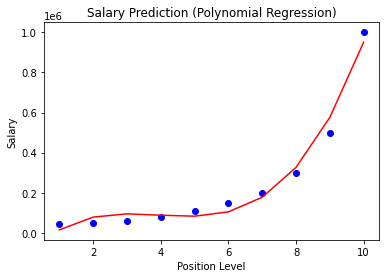

In [53]:
# To improve on the model, all we need to do is to increase degree of the polynomial
# Let's increase the degree to 3

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

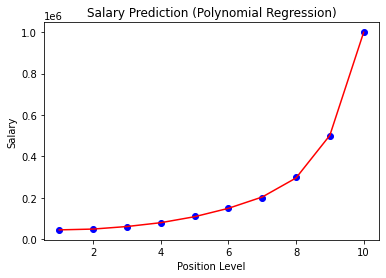

In [54]:
# Let's improve it the model further

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

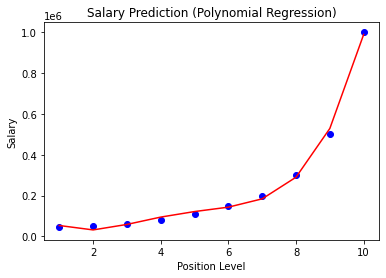

In [55]:
# Now we know where our cap is, let's decrease the degrees slightly 

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [56]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Linear prediction: 330378
Polynomial prediction: 158862


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
